In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('riceClassification.csv')

# Pandas
Stackplot:

In [3]:
# # Окружность рисинки
# roundness = data['Roundness'].value_counts()
# roundness_stack = np.array(roundness.sort_index())
# Площадь от диаметра рисинки
area = data[(data['Area'] != None)]['EquivDiameter'].value_counts()
area_stack = np.array(area.sort_index())
area_array = np.array([area.sort_index(), area_stack])
print(area_array)

[[1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 2]]


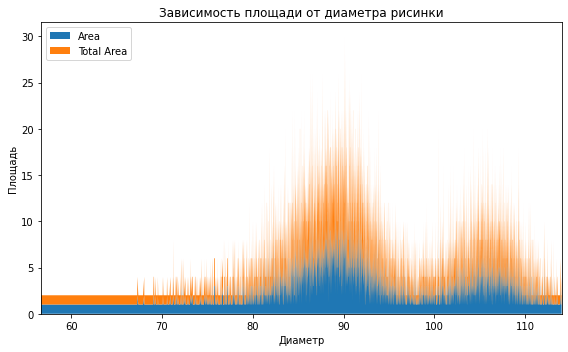

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.stackplot(area.sort_index().index, area_array, labels=['Area', 'Total Area'])
ax.set_title('Зависимость площади от диаметра рисинки')
ax.legend(loc='upper left')
ax.set_ylabel('Площадь')
ax.set_xlabel('Диаметр')
ax.set_xlim(left = area.index.min(), right = area.index.max())
fig.tight_layout()

plt.show()

Dataframe.plot

In [5]:
# area = data[(data['Area'] != None)]['EquivDiameter'].value_counts().sort_index()
# index = data['EquivDiameter'].unique()
# index.sort()
# area_array = pd.Series(data=area, index=index, dtype=None, name=None, copy=False, fastpath=False)

Bar Plot

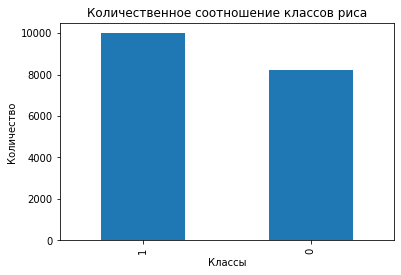

In [6]:
plt = data['Class'].value_counts().plot(kind='bar')
plt.set_title('Количественное соотношение классов риса')
plt.set_ylabel('Количество')
plt.set_xlabel('Классы');
# Class1 = data[(data['Class'] == '1')]['id'].size
# Class2 = data[(data['Class'] == '2')]['id'].size
# df = pd.DataFrame({'class': ['1', '2'], 'val': [Class1, Class2]})
# df.plot.bar(x='class', y='val', rot=0)

Density

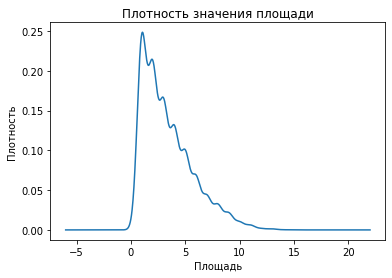

In [7]:
plt = data['Area'].value_counts().plot(kind='density')
plt.set_title('Плотность значения площади')
plt.set_ylabel('Плотность')
plt.set_xlabel('Площадь');

Pie Plot

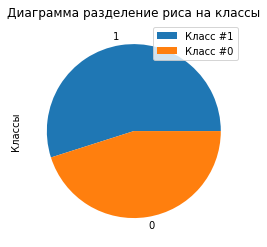

In [8]:
plt = data['Class'].value_counts().plot(kind='pie')
plt.set_title('Диаграмма разделение риса на классы')
plt.set_ylabel('Классы')
plt.legend(loc='upper right')
plt.legend(labels=['Класс #1', 'Класс #0'])

# Seasborn
SB Countplot

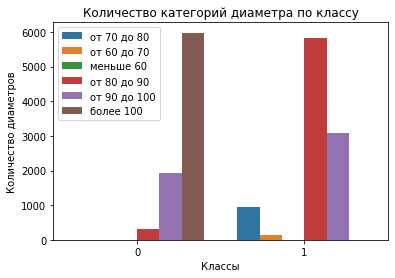

In [9]:
data['diameter_cat'] = data['EquivDiameter'].apply(lambda diameter: 'меньше 60' if diameter < 60 else 'от 60 до 70' if diameter > 60 and diameter < 70 else 'от 70 до 80' if diameter > 70 and diameter < 80 else 'от 80 до 90' if diameter > 80 and diameter < 90 else 'от 90 до 100' if diameter > 90 and diameter < 100 else 'более 100')
plt = sns.countplot(x='Class', hue='diameter_cat', data=data.loc[data['EquivDiameter']!=0,:])
plt.legend(loc='upper left')
plt.set_title("Количество категорий диаметра по классу")
plt.set_xlabel("Классы")
plt.set_ylabel("Количество диаметров");

SB Boxplot

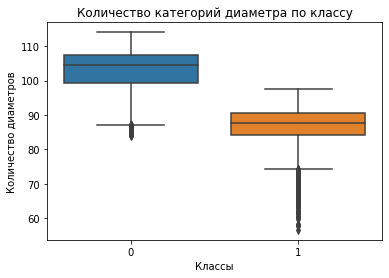

In [10]:
plt = sns.boxplot(x='Class', y='EquivDiameter', data=data)
plt.set_title("Количество категорий диаметра по классу")
plt.set_xlabel("Классы")
plt.set_ylabel("Количество диаметров");

SB Distplot

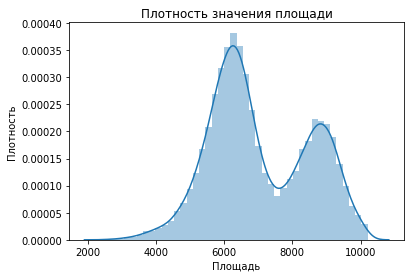

In [11]:
plt = sns.distplot(data.Area)
plt.set_title("Плотность значения площади")
plt.set_xlabel("Площадь")
plt.set_ylabel("Плотность");


SB Pairplot

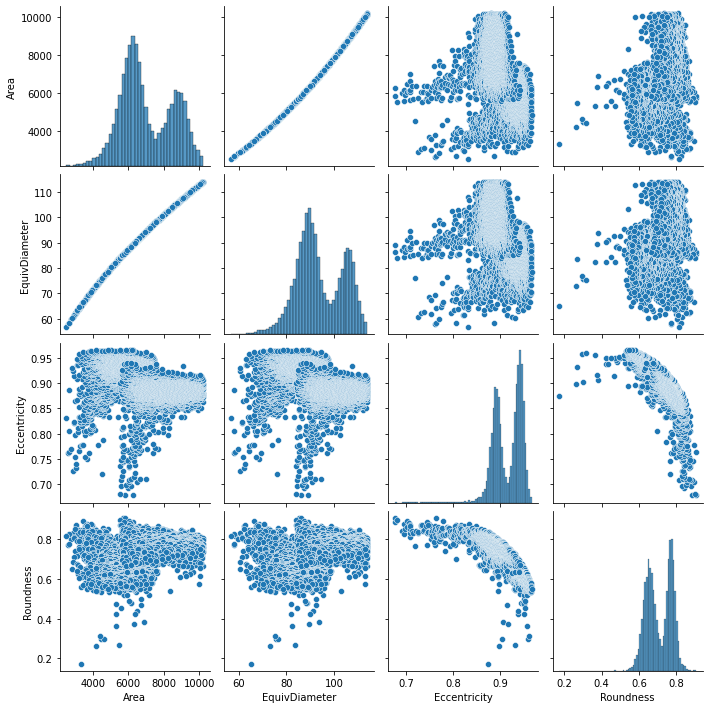

In [12]:
cols = ['Area', 'EquivDiameter', 'Eccentricity', 'Roundness']
sns_plot = sns.pairplot(data[cols])

# Модели машинного обучения 
1 Этап:

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = pd.read_csv('riceClassification.csv')
target = data['Class']
# Берём все колонки исключая ключевой признак
cols = ['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']
data = data[cols]
# data = data.drop(columns='Class')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,
                                                          random_state=15)

DecisionTree:

In [14]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=15)

In [15]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=15)

In [16]:
print(classification_report(y_test, clf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Neariest Neighbors:

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [18]:
print(classification_report(y_test, pred_knn, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1653
           1       0.96      0.99      0.98      1984

    accuracy                           0.97      3637
   macro avg       0.98      0.97      0.97      3637
weighted avg       0.97      0.97      0.97      3637



Logistic Regression:

In [19]:
logit = LogisticRegression(C=0.5, random_state=15, solver='liblinear')
logit.fit(X_train, y_train)
pred_log = logit.predict(X_test)

In [20]:
print(classification_report(y_test, pred_log, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Random Forest Regression:

In [21]:
# Для Random Forest используется отдельный датасет с целевым признаком
dataForest = pd.read_csv('riceClassification.csv')
targetF = dataForest['Class']
# cols = ['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']
# dataForest = dataForest[cols]
# data = data.drop(columns='Class')

X_trainF, X_testF, y_trainF, y_testF = train_test_split(dataForest, targetF, test_size=0.2,
                                                          random_state=15)

In [22]:
rndforest = RandomForestRegressor(n_estimators=10, oob_score=True, random_state=15)
rndforest.fit(X_trainF, y_trainF)
pred_rndforest = rndforest.predict(X_testF)

In [23]:
print(classification_report(y_testF, pred_rndforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Gradient Boosting Regression:

In [24]:
gradient = GradientBoostingClassifier(random_state=15)
gradient.fit(X_train, y_train)
pred_gradient = gradient.predict(X_test)

In [25]:
print(classification_report(y_test, pred_gradient, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



# 2 Этап 

Чистка датасета

In [26]:
data = pd.read_csv('riceClassification.csv')
dataOldDensity = data.shape[0] * data.shape[1] # Изначальное количество данных
target = data['Class']
# Берём все колонки исключая ключевой признак, id 
cols = ['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']
data = data[cols]
data = data.dropna() # Все строки заполнены полностью
# data = data.drop(columns='Class')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,
                                                          random_state=15)

In [27]:
print(f'Shape:{data.shape[0]}, Columns: {data.shape[1]}')
print(f'Density of data: {data.shape[0] * data.shape[1]}/{dataOldDensity} = {(data.shape[0] * data.shape[1]/dataOldDensity) * 100}%');

Shape:18185, Columns: 11
Density of data: 200035/218220 = 91.66666666666666%


Decision Tree:

In [28]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=15)
clf_tree.fit(X_train, y_train)
print(classification_report(y_test, clf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Neariest Neightboor:

In [29]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [30]:
print(classification_report(y_test, pred_knn, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1653
           1       0.96      0.99      0.98      1984

    accuracy                           0.97      3637
   macro avg       0.98      0.97      0.97      3637
weighted avg       0.97      0.97      0.97      3637



Logistic Regression:

In [31]:
logit = LogisticRegression(C=0.5, random_state=15, solver='liblinear')
logit.fit(X_train, y_train)
pred_log = logit.predict(X_test)

In [32]:
print(classification_report(y_test, pred_log, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Random Forest Regression:

In [33]:
# Для Random Forest используется отдельный датасет с целевым признаком
dataForest = pd.read_csv('riceClassification.csv')
targetF = dataForest['Class']
# cols = ['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']
# dataForest = dataForest[cols]
# data = data.drop(columns='Class')

X_trainF, X_testF, y_trainF, y_testF = train_test_split(dataForest, targetF, test_size=0.2,
                                                          random_state=15)

In [34]:
rndforest = RandomForestRegressor(n_estimators=10, oob_score=True, random_state=15)
rndforest.fit(X_trainF, y_trainF)
pred_rndforest = rndforest.predict(X_testF)

In [35]:
print(classification_report(y_testF, pred_rndforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Gradient Boosting:

In [36]:
gradient = GradientBoostingClassifier(random_state=15)
gradient.fit(X_train, y_train)
pred_gradient = gradient.predict(X_test)

In [37]:
print(classification_report(y_test, pred_gradient, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



# 3 Этап

Decision Tree:

In [38]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=15)
clf_tree.fit(X_train, y_train)
print(classification_report(y_test, clf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Neariest Neighbors:

In [39]:
knn = KNeighborsClassifier(n_neighbors=10000)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [40]:
print(classification_report(y_test, pred_knn, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1653
           1       0.93      0.97      0.95      1984

    accuracy                           0.94      3637
   macro avg       0.94      0.94      0.94      3637
weighted avg       0.94      0.94      0.94      3637



Logistic Regression:

In [41]:
logit = LogisticRegression(C=7.5, random_state=15, solver='liblinear')
logit.fit(X_train, y_train)
pred_log = logit.predict(X_test)

In [42]:
print(classification_report(y_test, pred_log, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Random Forest:

In [43]:
rndforest = RandomForestRegressor(n_estimators=1000, oob_score=False, random_state=15)
rndforest.fit(X_trainF, y_trainF)
pred_rndforest = rndforest.predict(X_testF)

In [44]:
print(classification_report(y_testF, pred_rndforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



Gradient Boosting:

In [45]:
gradient = GradientBoostingClassifier(random_state=50)
gradient.fit(X_train, y_train)
pred_gradient = gradient.predict(X_test)

In [46]:
print(classification_report(y_test, pred_gradient, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637

